In [1]:
%load_ext rpy2.ipython
import warnings
# Link to Github : https://github.com/areyesq89/PR2017replicaton
# https://www.markdownguide.org/cheat-sheet/

In [2]:
%%R
library(dplyr)

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




#Tutorial 1 Exploration
- Jasiel Rivera

# What kind of variables are in the data? Are these variables numerical and/or categorical? What does each column represent?
- There is 6 kind of variables on this data. CellLine, drug, doseID, concentration, vaibility, study. Some of them are numerical others are categorical. The first column represent the kind of variable, the second column indicate the type of the variable and the last one indicates the values

In [3]:
%%R
rawFile <- "/content/rawPharmacoData.csv"
pharmacoData <- read.csv(rawFile)
head( pharmacoData )
str( pharmacoData )


'data.frame':	43427 obs. of  6 variables:
 $ cellLine     : chr  "22RV1" "22RV1" "22RV1" "22RV1" ...
 $ drug         : chr  "Nilotinib" "Nilotinib" "Nilotinib" "Nilotinib" ...
 $ doseID       : chr  "doses1" "doses2" "doses3" "doses4" ...
 $ concentration: num  0.0025 0.008 0.025 0.08 0.25 0.8 2.53 8 0.0025 0.008 ...
 $ viability    : num  110 107.7 97.8 115.1 129.5 ...
 $ study        : chr  "CCLE" "CCLE" "CCLE" "CCLE" ...


# How many drugs are contained in these data?
# 43427 


In [4]:
%%R
# length(pharmacoData$drug)
length(unique(pharmacoData$cellLine))

[1] 288


#How many drug concentrations were used in each study?
CCLE 8
GDSC 9


In [5]:
%%R
tapply( pharmacoData$doseID, pharmacoData$study, function(x){
        length( unique( x ) )
    })


CCLE GDSC 
   8    9 


#Based on these plots, which study would you say has the most consistent experimental protocol?
- CCLE

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



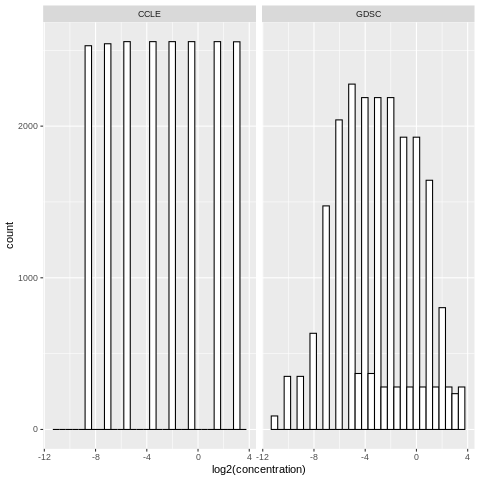

In [6]:
%%R
library(ggplot2)
# library(cowplot)
ggplot( pharmacoData, aes( log2(concentration) ) ) +
    geom_histogram(fill = "white", colour="black") +
    facet_wrap(~study)

[1] 15778


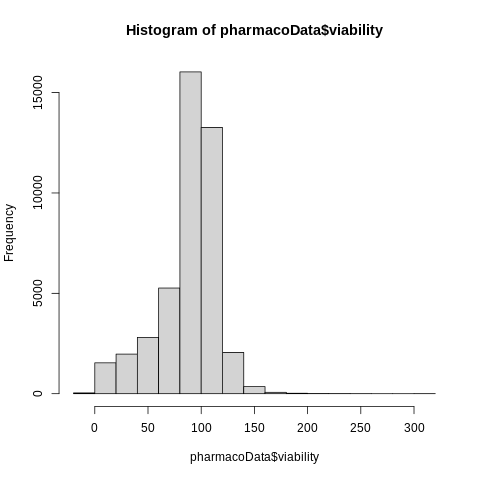

In [7]:
%%R
hist(pharmacoData$viability)
sum(pharmacoData$viability > 100)

Below, we will explore the range of the data and calculate how
many data points are below 0 and above 100.

In [8]:
%%R
range( pharmacoData$viability )
sum( pharmacoData$viability < 0 )
sum( pharmacoData$viability > 100 )

[1] 15778


We can also compare the distribution of viability scores between 
the two studies using density plots. Based on the distribution of 
the viability scores, would you say there are obvious differences 
between the two studies?
- There is not an obvious difference between the two.


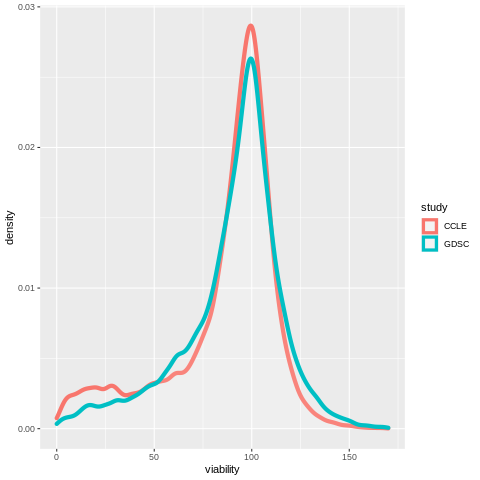

In [9]:
%%R
ggplot( pharmacoData, aes( viability, group=study, colour=study) ) +
    geom_density(fill="white", lwd=2, alpha=0.1) + xlim(0, 170)

The code below plots the viability scores as box-plots for each drug, stratified by the two studies. Can you tell something about the toxic properties of the different 
drugs? Are these properties consistent across studies?
- Other than Paditabel, these studies seem to be consistent.

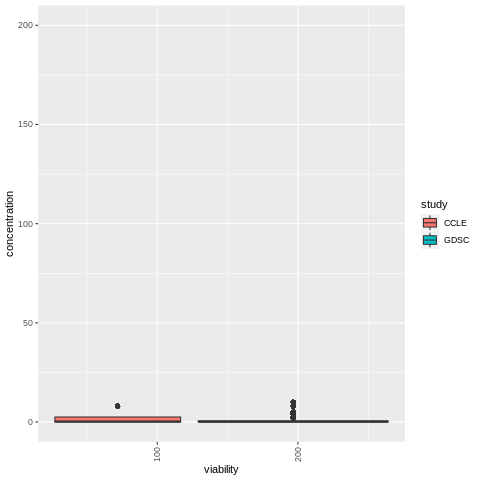

In [10]:
%%R
ggplot( pharmacoData, aes( y=concentration, x=viability, fill=study) ) +
    geom_boxplot() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust=.5)) +
    ylim(0, 200)

# How many cell-lines are contained in the data?
- 288

In [11]:
%%R
rawFile <- "/content/rawPharmacoData.csv"
pharmacoData <- read.csv(rawFile)
head(pharmacoData)
str(pharmacoData)

'data.frame':	43427 obs. of  6 variables:
 $ cellLine     : chr  "22RV1" "22RV1" "22RV1" "22RV1" ...
 $ drug         : chr  "Nilotinib" "Nilotinib" "Nilotinib" "Nilotinib" ...
 $ doseID       : chr  "doses1" "doses2" "doses3" "doses4" ...
 $ concentration: num  0.0025 0.008 0.025 0.08 0.25 0.8 2.53 8 0.0025 0.008 ...
 $ viability    : num  110 107.7 97.8 115.1 129.5 ...
 $ study        : chr  "CCLE" "CCLE" "CCLE" "CCLE" ...


# What drug concentrations were used in each study?

In [12]:
import pandas as pd
df = pd.read_csv(r'/content/rawPharmacoData.csv')

# load CCLE DATA
CCLE = df[(df['study'] == 'CCLE')]
unique = CCLE['concentration'].unique()
print("Concentrations used in CCCLE")
for number in unique:
  print(round(number, 2))

# load GDSC DATA
GDSC = df[(df['study'] == 'GDSC')]
unique = GDSC['concentration'].unique()
print("Concentrations used in GDSC")
for number in unique:
  print(round(number, 2))



Concentrations used in CCCLE
0.0
0.01
0.02
0.08
0.25
0.8
2.53
8.0
Concentrations used in GDSC
0.01
0.02
0.03
0.06
0.12
0.25
0.5
1.0
2.0
0.0
4.0
8.0
0.0
0.0
0.0
0.0
0.0
0.0
0.01
0.01
0.03
0.05
0.1
0.04
0.08
0.16
0.31
0.62
1.25
2.5
5.0
10.0


# Histograms, appart from telling how is the data distributed, can also make evident potential problems with the data. Plot a histogram of drug viabilities. Does it look as one would expect from the description of the data?

No, it doesnt look like it should. By definition viability has a range from 0 to 100. As we can see, on this histogram theare some values over 100.

[1] 15778


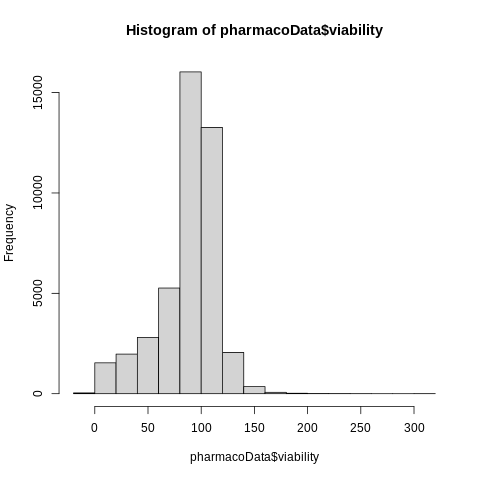

In [13]:
%%R
hist(pharmacoData$viability)
sum(pharmacoData$viability > 100)

# How many viability data points are within the expected range according to the definition of viability (e.g. above 0  and below 100)? Try to come up with explanations about the values that are out of range. Are these due to technical issues? Biology?

In [14]:
%%R
range( pharmacoData$viability )
sum( pharmacoData$viability < 0 )
sum( pharmacoData$viability < 100 )

[1] 27649


# 5. Read the csv file containing the summarized data files. What kind of variables are in the data? What does each column represents?

There is 6 kind of variables on this data. CellLine, drug, ic50_CCLE, auc_CCLE, ic50_GDSC, auc_GDSC. Cellline and drug are categorial the others are numerical. ic50 is a measurment of effectivines of drugs and auc is the are under the curve.

In [15]:
%%R
cellLinesSummary <- read.csv("summarizedPharmacoData.csv", header=TRUE)
str(cellLinesSummary)

'data.frame':	2557 obs. of  6 variables:
 $ cellLine : chr  "22RV1" "5637" "639-V" "697" ...
 $ drug     : chr  "Nilotinib" "Nilotinib" "Nilotinib" "Nilotinib" ...
 $ ic50_CCLE: num  8 7.48 8 1.91 8 ...
 $ auc_CCLE : num  0 0.00726 0.07101 0.15734 0 ...
 $ ic50_GDSC: num  155.27 219.93 92.18 3.06 19.63 ...
 $ auc_GDSC : num  0.00394 0.00362 0.00762 0.06926 0.02876 ...


# Plot a histogram of the viability scores as a function of the drug doses. Are stronger drug concentrations consistent with lower viability scores?

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



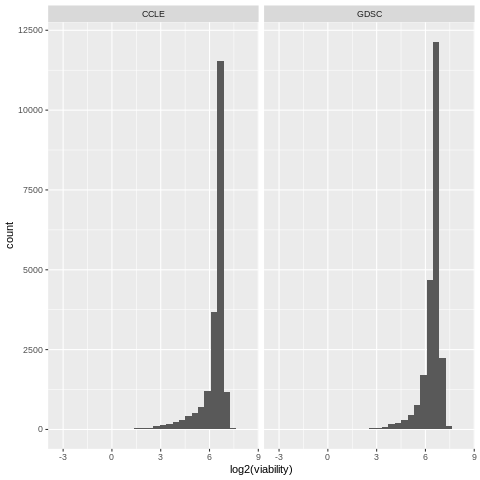

In [16]:
%%R
library(ggplot2)
ggplot( pharmacoData, aes(log2(viability)) ) + geom_histogram() + facet_wrap(~study)

When the drug concentreations increases too high the viability decreases. This is also true when the concentration is very low. It seems that the sweet spot is around 6.

# Tutorial 1 Conclusion

In this tutorial we explored the data we are working with. We then made sure that the data made sense and was correct, and performed a basic analysis using an histogram of the viability as a function to the drug concentration.


# Tutorial 2: Using Correlation Measures to Assess Replicability of Drug Response Studies

* Michael H. Terrefortes Rosado

In [17]:
%load_ext rpy2.ipython
import warnings
warnings.filterwarnings('ignore')

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [18]:
%%R
library(dplyr)

![Image of IC50](Figures/IC50.jpg)

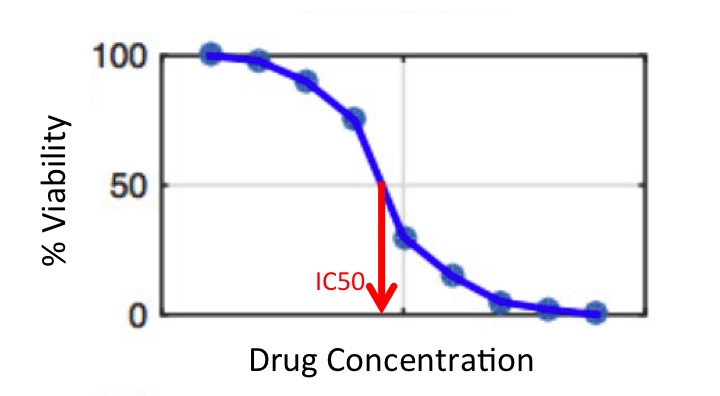

Are cell lines with higher IC50 values more or less susceptible? What about drugs with higher IC50 values - are they more or less toxic?

In [19]:
%%R
cellLinesSummary <- read.csv("summarizedPharmacoData.csv", header=TRUE)
str(cellLinesSummary)


'data.frame':	2557 obs. of  6 variables:
 $ cellLine : chr  "22RV1" "5637" "639-V" "697" ...
 $ drug     : chr  "Nilotinib" "Nilotinib" "Nilotinib" "Nilotinib" ...
 $ ic50_CCLE: num  8 7.48 8 1.91 8 ...
 $ auc_CCLE : num  0 0.00726 0.07101 0.15734 0 ...
 $ ic50_GDSC: num  155.27 219.93 92.18 3.06 19.63 ...
 $ auc_GDSC : num  0.00394 0.00362 0.00762 0.06926 0.02876 ...


In [20]:
%%R
length(unique(cellLinesSummary$cellLine))

[1] 288


In [21]:
%%R
length(unique(cellLinesSummary$drug))

[1] 15


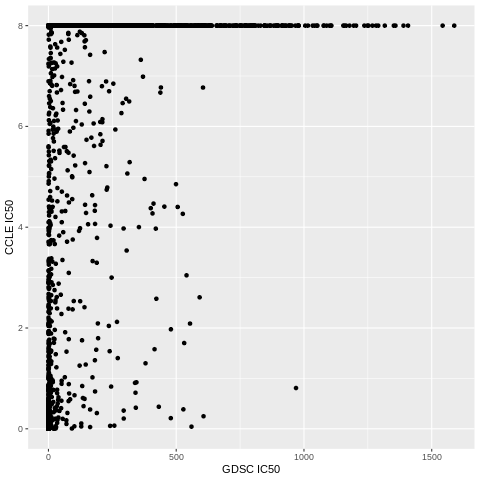

In [22]:
%%R
library(ggplot2)
ggplot(aes(x=ic50_GDSC, y=ic50_CCLE), data=subset(cellLinesSummary)) +geom_point() + xlab("GDSC IC50") + ylab("CCLE IC50")


**Answer: The drugs with higher IC50 values are more susceptible. The drugs with more IC50 drug concentration is less viable. Based on the photo the more drug concentration the lower the viability. Also based on the study by Haibe-Kains, "cell lines with lower IC50 (or AUC) values than this range are defined as sensitive, and those with IC50 (or AUC) values higher than this range are called resistant."** 

![Image of AUC](Figures/AUC.jpg)

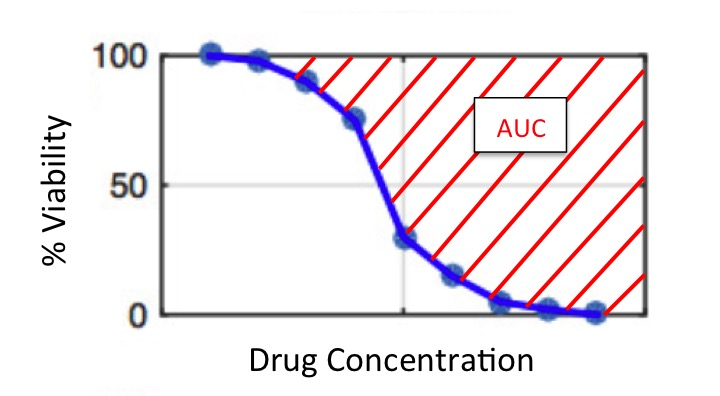

Are cell lines with higher values of AUC more or less resistant?

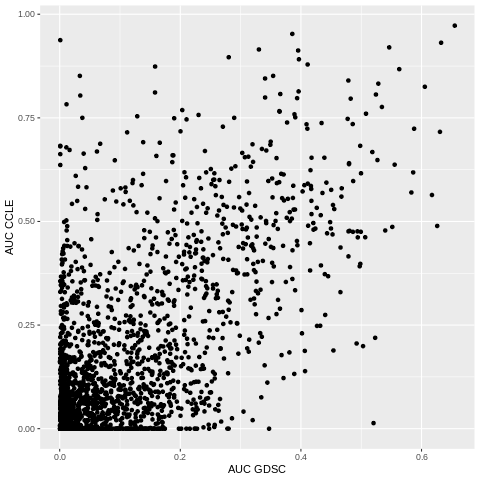

In [23]:
%%R
library(ggplot2)
ggplot(aes(x=auc_GDSC, y=auc_CCLE), data=subset(cellLinesSummary)) +geom_point() + xlab("AUC GDSC") + ylab("AUC CCLE")


**Answer: The cell lines with higher AUC values are more resistant. Also based on the study by Haibe-Kains, "those with IC50 (or AUC) values higher than this range are called resistant."**

Are drugs with higher AUC more or less toxic?

**Answer: Higher AUC drugs are more toxic because they have a lower viability percentage. This is based on the previous image of AUC and the drug concentration and viability**

In [24]:
%%R
cellLinesSummary <- read.csv("summarizedPharmacoData.csv", header=TRUE)
str(cellLinesSummary)

'data.frame':	2557 obs. of  6 variables:
 $ cellLine : chr  "22RV1" "5637" "639-V" "697" ...
 $ drug     : chr  "Nilotinib" "Nilotinib" "Nilotinib" "Nilotinib" ...
 $ ic50_CCLE: num  8 7.48 8 1.91 8 ...
 $ auc_CCLE : num  0 0.00726 0.07101 0.15734 0 ...
 $ ic50_GDSC: num  155.27 219.93 92.18 3.06 19.63 ...
 $ auc_GDSC : num  0.00394 0.00362 0.00762 0.06926 0.02876 ...


In [25]:
%%R
length(unique(cellLinesSummary$cellLine))


[1] 288


In [26]:
%%R
length(unique(cellLinesSummary$drug))

[1] 15


Was every cell line in the dataset tested with every drug?

In [27]:
%%R
x <- table(cellLinesSummary$cellLine)
freq_df <- as.data.frame(x)
filter(freq_df, Freq == 15)

           Var1 Freq
1           697   15
2          A253   15
3         BL-41   15
4        BT-474   15
5        C2BBe1   15
6         CAS-1   15
7  COLO-320-HSR   15
8           DEL   15
9       DMS-114   15
10       DOHH-2   15
11          EB2   15
12         EM-2   15
13         GB-1   15
14         GCIY   15
15      HCC1187   15
16           HH   15
17           HT   15
18       HT-144   15
19     IST-MES1   15
20        JVM-3   15
21   KARPAS-299   15
22   KARPAS-422   15
23         KG-1   15
24       KNS-42   15
25    KNS-81-FD   15
26        KU812   15
27    KURAMOCHI   15
28        L-363   15
29        L-428   15
30         LP-1   15
31       LS-123   15
32       LS-513   15
33        MC116   15
34       MEG-01   15
35       MPP-89   15
36    NCI-H1092   15
37    NCI-H1355   15
38    NCI-H1581   15
39    NCI-H1694   15
40     NCI-H226   15
41      NCI-H23   15
42     NCI-H747   15
43    NCI-SNU-1   15
44   NCI-SNU-16   15
45     OCI-AML2   15
46        OPM-2   15
47      OVCAR

**Answer: Every cell line was tested with some drug. Based on the previous code there were 15 drugs and not all the cellLines were tested with all 15 drugs. The list above shows the cellLines tested with 15 drugs** 

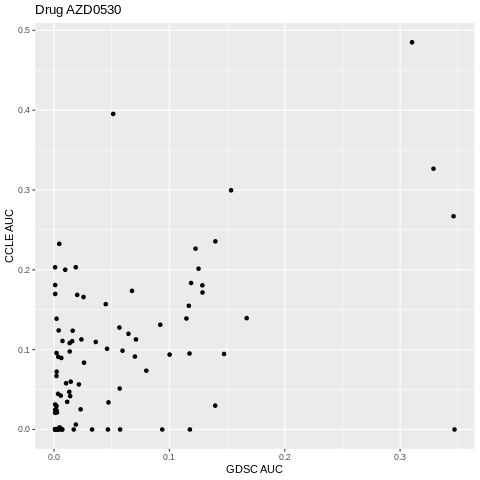

In [28]:
%%R
library(ggplot2)
x <- ggplot(aes(x=auc_GDSC, y=auc_CCLE), data=subset(cellLinesSummary, drug=="AZD0530")) +geom_point() + xlab("GDSC AUC") + ylab("CCLE AUC") 

print(x + ggtitle("Drug AZD0530"))

Perfect agreement between the GDSC and CCLE AUC values would mean all the points would fall on a straight line. How would you describe the level of agreement between the AUC values of drug AZD0530 in the CCLE and GDSC studies? Does it seem like higher values of AUC in the GDSC correspond to higher values in the CCLE?

**Answer: Theres some agreement in the middle but also very spread values. It looks like lower values of GDSC correspond to lower values of CCLE. There are some outliers where the high value CCLE also corresponds to high value in GDSC**

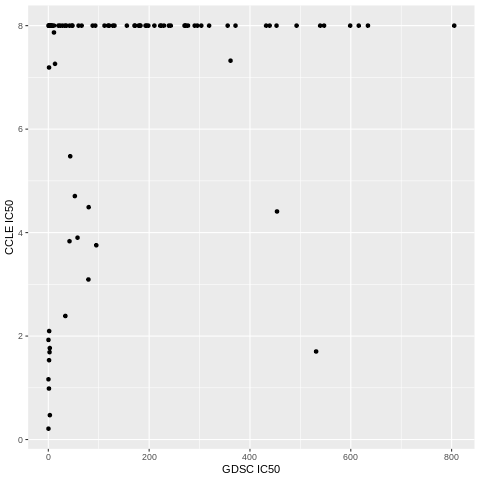

In [29]:
%%R
ggplot(aes(x=ic50_GDSC, y=ic50_CCLE), data=subset(cellLinesSummary, drug=="AZD0530")) +
    geom_point() +
    xlab("GDSC IC50") +
    ylab("CCLE IC50")

What is different about this plot compared to the AUC plot for this drug above?

**Answer: The difference is how there seems to be very little correlation compared with the previous graph. For example a high value in IC50 can have a lower value in IC50 so there is no correlation only in a few outliers.**

First, you may notice that there are many points with the highest value of IC50 for CCLE. Recall that this study measured a fixed set of doses, regardless of how the cells responded, whereas in the GDSC drug concentrations were increased if no response was observed. What does this mean for the IC50 values in the CCLE? Are they more likely to be too high or too low? Why?

**Answer: For the CCLE values which are fixed doses they are more likely to be high. Again this occurs because the doses are fixed regardless of how the cells responded. While on the GDSC the doses increased when no reaction occured so in this value the cells are more spread out while in CCLE are almost all high.**

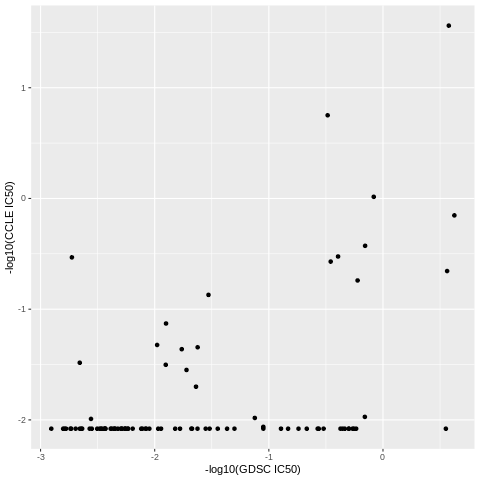

In [30]:
%%R
ggplot(aes(x=-log10(ic50_GDSC), y=-log(ic50_CCLE)), data=subset(cellLinesSummary, drug=="AZD0530")) +
    geom_point() +
    xlab("-log10(GDSC IC50)") +
    ylab("-log10(CCLE IC50)") 

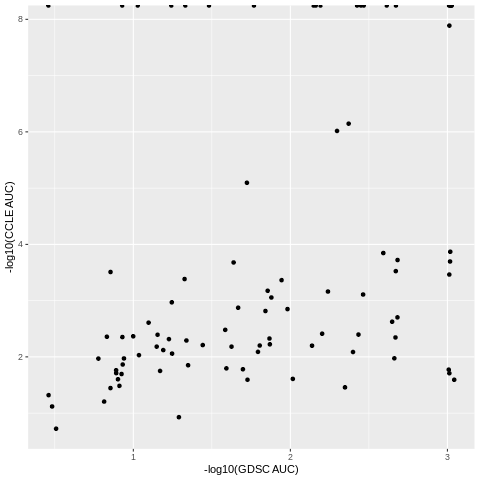

In [31]:
%%R
ggplot(aes(x=-log10(auc_GDSC), y=-log(auc_CCLE)), data=subset(cellLinesSummary, drug=="AZD0530")) +
    geom_point() +
    xlab("-log10(GDSC AUC)") +
    ylab("-log10(CCLE AUC)")

How would you describe the level of agreement between the IC50 values of drug AZD0530 in the CCLE and GDSC studies? Does it seem like higher values of AUC in the GDSC correspond to higher values in the CCLE?

**Answer: Based on the IC50 graph there appears to be little agreement between CCLE and GDSC. This is because the dots dont appear in a stright line or similar to it. Based on the graph theres little to no correlation between the high GDSC and high CCLE values. There are noticible higher GDSC values but in many cases the CCLE stays low. There are many outliers that it shows how the GDSC high values correlates with the CCLE high value**

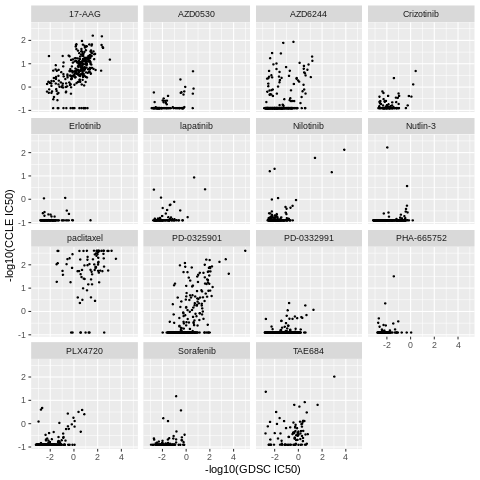

In [32]:
%%R
ggplot(aes(x=-log10(ic50_GDSC), y=-log10(ic50_CCLE)), data=cellLinesSummary) +
    geom_point(cex=0.5) + 
    facet_wrap(facets=~drug) +
    xlab("-log10(GDSC IC50)") +
    ylab("-log10(CCLE IC50)")

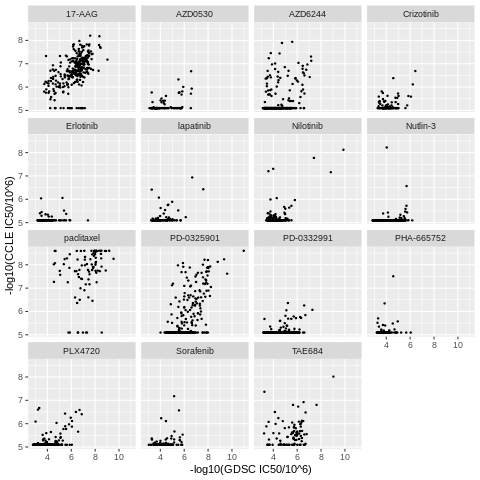

In [33]:
%%R
ggplot(aes(x=-log10(ic50_GDSC/10^6), y=-log10(ic50_CCLE/10^6)), data=cellLinesSummary) +
    geom_point(cex=0.5) + 
    facet_wrap(facets=~drug) +
    xlab("-log10(GDSC IC50/10^6)") +
    ylab("-log10(CCLE IC50/10^6)") 

Compare this plot to Figure 2 in the Haibe-Kains reanalysis paper. Does it seem to agree?

**Answer: Based on the Figure 2 of the Haibe-Kains reanalysis paper both graphs agree and are similar. Both of them have similar outliers.**
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4237165/

Looking at the IC50 values for both studies across all 15 drugs, would you say that they tend to agree? Why or why not?

**Answer: Looking at the results of IC50 values of both studies of 15 drugs they tend to agree. The reason being because they have the similar graphs and outliers. The 15 graphs of Haibe-Kains paper looks the same as the one in here.**
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4237165/

One way to quantify the degree of agreement of two variables is to calculate the *correlation*. Correlation is a statistic between -1 and 1 that measures the degree of association between two variables. In this case our two variables are the drug response in CCLE and the drug response for GDSC. The higher the correlation value, the more the two variables agree with one other. If two variables are exactly the same, then the correlation is equal to 1. If two variables are unrelated, then the correlation value will be close to zero. What would a negative correlation mean?

**Answer: A negative indicates that one variable increases while the other decreases, and vice-versa. It means that the relationship that exists is always opposite of each other.**

R[write to console]: `geom_smooth()` using formula 'y ~ x'



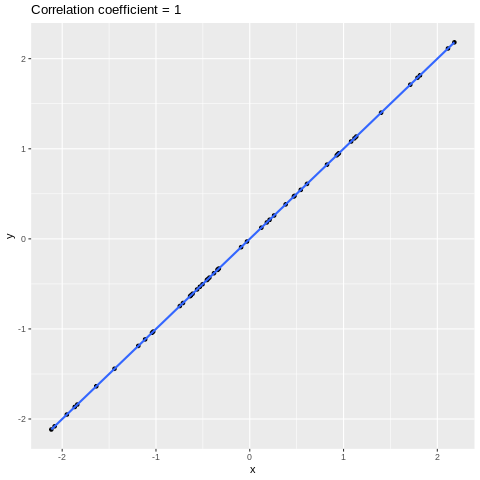

In [34]:
%%R
# set seed for reproducibility
set.seed(738)

# Perfect correlation
x <- rnorm(50)
perfect <- data.frame(x=x, y=x)
cor.coef <- round(cor(perfect$x, perfect$y),2)
ggplot(data=perfect, aes(x=x,y=y)) +
  geom_point() +
  ggtitle(paste0("Correlation coefficient = ", cor.coef)) + 
  geom_smooth(method='lm', se=FALSE)

R[write to console]: `geom_smooth()` using formula 'y ~ x'



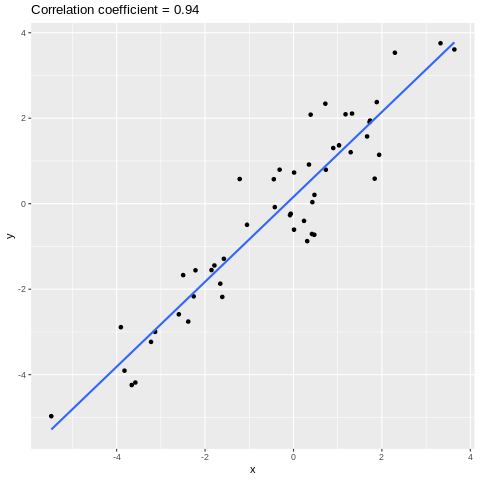

In [35]:
%%R
# Strong correlation
x <- rnorm(50,0,2)
strong <- data.frame(x=x, y=x+rnorm(50,0,0.75))
cor.coef <- round(cor(strong$x, strong$y),2)
ggplot(data=strong, aes(x=x,y=y)) +
  geom_point() +
  ggtitle(paste0("Correlation coefficient = ", cor.coef))+ 
  geom_smooth(method='lm', se=FALSE)

R[write to console]: `geom_smooth()` using formula 'y ~ x'



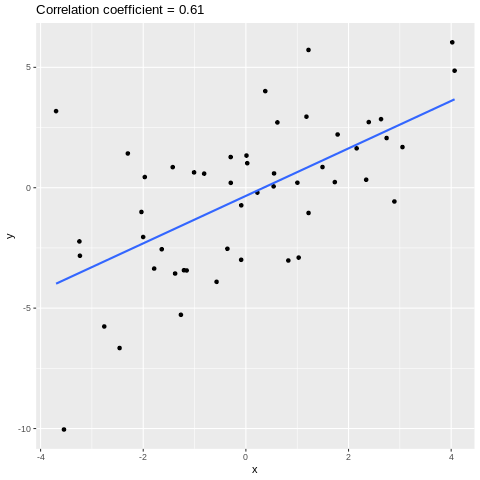

In [36]:
%%R
# Moderate correlation
x <- rnorm(50,0,2)
moderate <- data.frame(x=x, y=x+rnorm(50,0,2.5))
cor.coef <- round(cor(moderate$x, moderate$y),2)
ggplot(data=moderate, aes(x=x,y=y)) +
  geom_point() +
  ggtitle(paste0("Correlation coefficient = ", cor.coef))+ 
  geom_smooth(method='lm', se=FALSE)

R[write to console]: `geom_smooth()` using formula 'y ~ x'



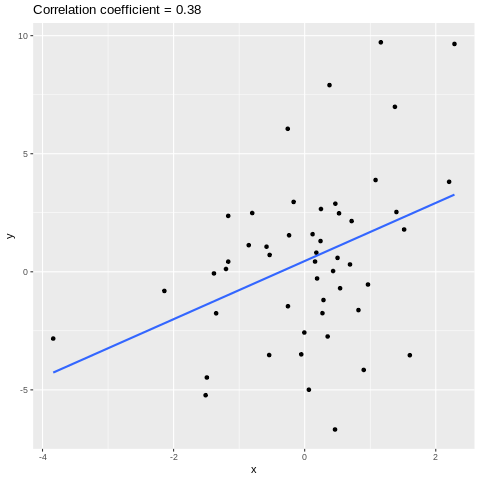

In [37]:
%%R
# Weak correlation
x <- rnorm(50,0,1)
weak <- data.frame(x=x, y=x+rnorm(50,0,4))
cor.coef <- round(cor(weak$x, weak$y),2)
ggplot(data=weak, aes(x=x,y=y)) +
  geom_point() +
  ggtitle(paste0("Correlation coefficient = ", cor.coef))+ 
  geom_smooth(method='lm', se=FALSE)

R[write to console]: `geom_smooth()` using formula 'y ~ x'



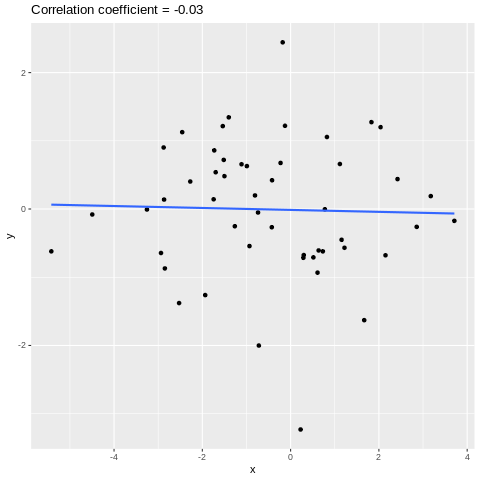

In [38]:

%%R
# No correlation
x <- rnorm(50,0,2)
none <- data.frame(x=x, y=rnorm(50),0,2)
cor.coef <- round(cor(none$x, none$y),2)
ggplot(data=none, aes(x=x,y=y)) +
  geom_point() +
  ggtitle(paste0("Correlation coefficient = ", cor.coef))+ 
  geom_smooth(method='lm', se=FALSE)

R[write to console]: `geom_smooth()` using formula 'y ~ x'



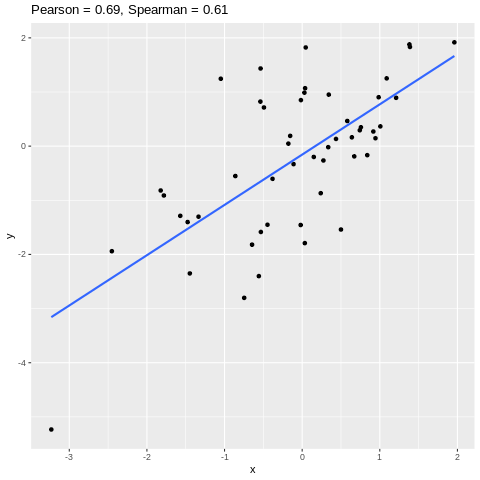

In [39]:
%%R
# Same
x <- rnorm(50,0,1)
corrcomp <- data.frame(x=x, y=x+rnorm(50,0,1))
cor.pearson <- round(cor(corrcomp$x, corrcomp$y, method="pearson"),2)
cor.spearman <- round(cor(corrcomp$x, corrcomp$y, method="spearman"),2)
ggplot(data=corrcomp, aes(x=x,y=y)) +
  geom_point() +
  ggtitle(paste0("Pearson = ", cor.pearson, ", Spearman = ", cor.spearman))+ 
  geom_smooth(method='lm', se=FALSE)

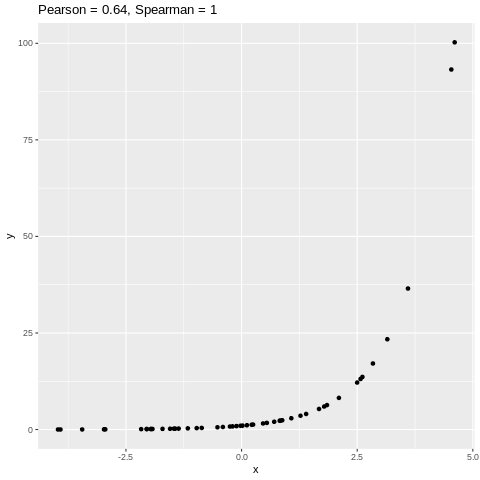

In [40]:
%%R
# Different
x <- rnorm(50,0,2)
corrcomp <- data.frame(x=x, y=exp(x))
cor.pearson <- round(cor(corrcomp$x, corrcomp$y, method="pearson"),2)
cor.spearman <- round(cor(corrcomp$x, corrcomp$y, method="spearman"),2)
ggplot(data=corrcomp, aes(x=x,y=y)) +
  geom_point() +
  ggtitle(paste0("Pearson = ", cor.pearson, ", Spearman = ", cor.spearman))

In the previous example, why is the Spearman correlation so high, while the Pearson correlation is only moderate?

 **Answer: This is a monotonously increasing ratio, so Spearman is exactly 1. It means both values are monotonically related even if their relationship is not lineal.**

In [41]:
%%R

drugCorrs <- cellLinesSummary %>% 
    group_by(drug) %>% summarise(Pearson_ic50=cor(-log10(ic50_GDSC/10^6),-log10(ic50_CCLE/10^6), method="pearson"),
                                 Spearman_ic50=cor(-log10(ic50_GDSC/10^6),-log10(ic50_CCLE/10^6), method="spearman"))
drugCorrs

# A tibble: 15 × 3
   drug       Pearson_ic50 Spearman_ic50
   <chr>             <dbl>         <dbl>
 1 17-AAG           0.543         0.586 
 2 AZD0530          0.455         0.360 
 3 AZD6244          0.320         0.244 
 4 Crizotinib       0.409         0.106 
 5 Erlotinib        0.0812        0.0800
 6 lapatinib        0.427         0.289 
 7 Nilotinib        0.611         0.122 
 8 Nutlin-3         0.143         0.306 
 9 paclitaxel       0.211         0.350 
10 PD-0325901       0.625         0.580 
11 PD-0332991       0.240         0.141 
12 PHA-665752       0.118         0.0554
13 PLX4720          0.456         0.358 
14 Sorafenib        0.277         0.329 
15 TAE684           0.287         0.268 


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/reshape2_1.4.4.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 37307 bytes (36 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

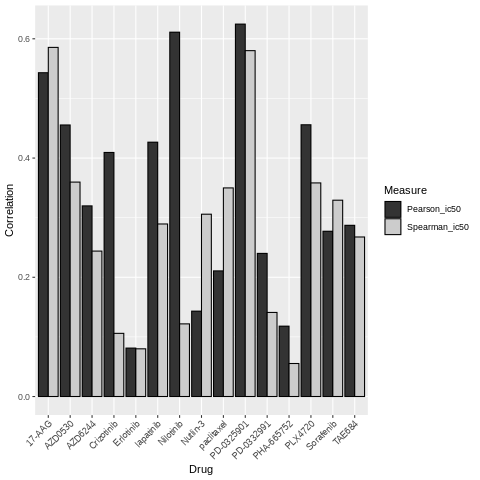

In [42]:
%%R
install.packages('reshape2')
library(reshape2)

drugCorrs <- melt(drugCorrs)
colnames(drugCorrs) <- c("Drug", "Measure", "Correlation")
drugCorrs_IC50 <- drugCorrs[grep("ic50", drugCorrs$Measure),]

ggplot(data=drugCorrs_IC50, aes(x=Drug, y=Correlation, fill=Measure, group=Measure)) +
  geom_bar(stat="identity", position=position_dodge(), colour="black") + 
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_grey()

#1. Create a scatterplot for each drug comparing the AUC in GDSC and CCLE for all cell lines (hint: code from Tutorial 2 may help).

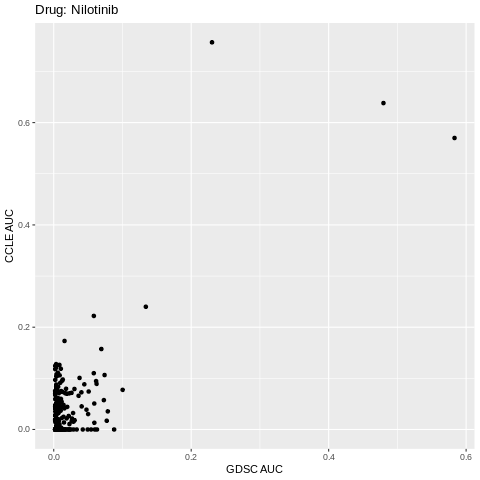

In [43]:
%%R
library(ggplot2)
x <- ggplot(aes(x=auc_GDSC, y=auc_CCLE), data=subset(cellLinesSummary, drug=="Nilotinib")) +geom_point() + xlab("GDSC AUC") + ylab("CCLE AUC")
print(x + ggtitle("Drug: Nilotinib"))

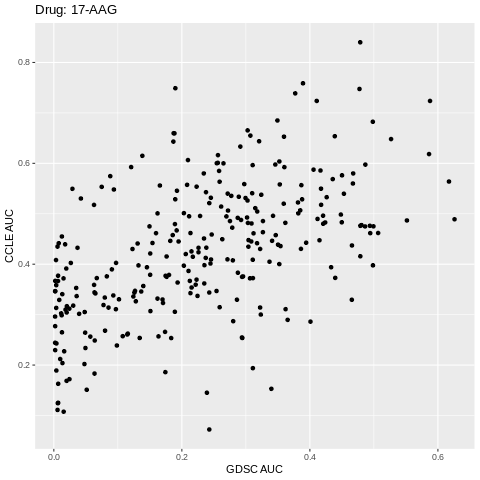

In [44]:
%%R
library(ggplot2)
x <- ggplot(aes(x=auc_GDSC, y=auc_CCLE), data=subset(cellLinesSummary, drug=="17-AAG")) +geom_point() + xlab("GDSC AUC") + ylab("CCLE AUC")
print(x + ggtitle("Drug: 17-AAG"))

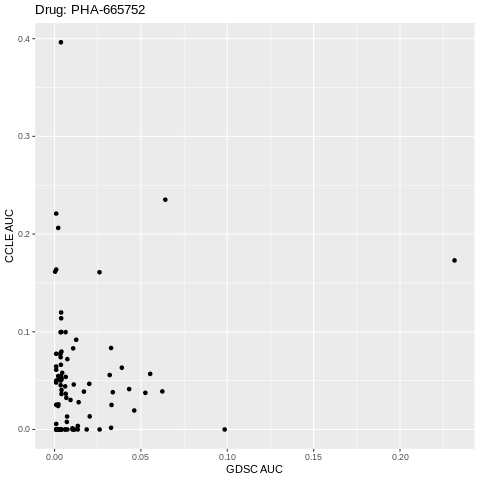

In [45]:
%%R
library(ggplot2)
x <- ggplot(aes(x=auc_GDSC, y=auc_CCLE), data=subset(cellLinesSummary, drug=="PHA-665752")) +geom_point() + xlab("GDSC AUC") + ylab("CCLE AUC") 
print(x + ggtitle("Drug: PHA-665752"))

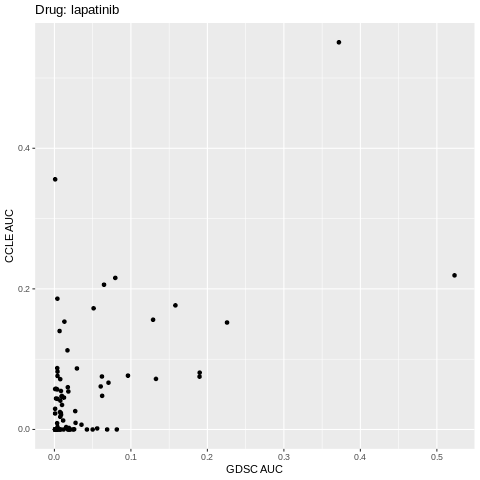

In [46]:
%%R
library(ggplot2)
x <- ggplot(aes(x=auc_GDSC, y=auc_CCLE), data=subset(cellLinesSummary, drug=="lapatinib")) +geom_point() + xlab("GDSC AUC") + ylab("CCLE AUC")
print(x + ggtitle("Drug: lapatinib"))

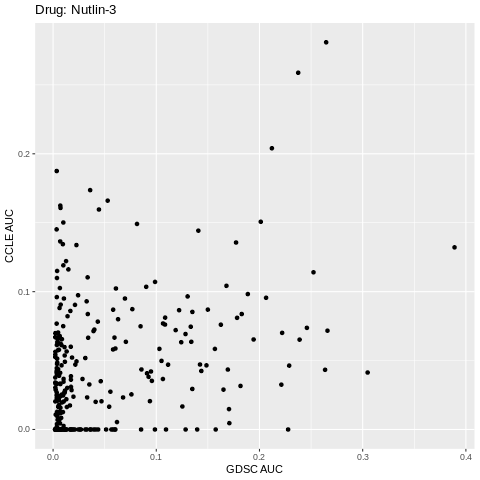

In [47]:
%%R
library(ggplot2)
x <- ggplot(aes(x=auc_GDSC, y=auc_CCLE), data=subset(cellLinesSummary, drug=="Nutlin-3")) +geom_point() + xlab("GDSC AUC") + ylab("CCLE AUC") 
print(x + ggtitle("Drug: Nutlin-3"))

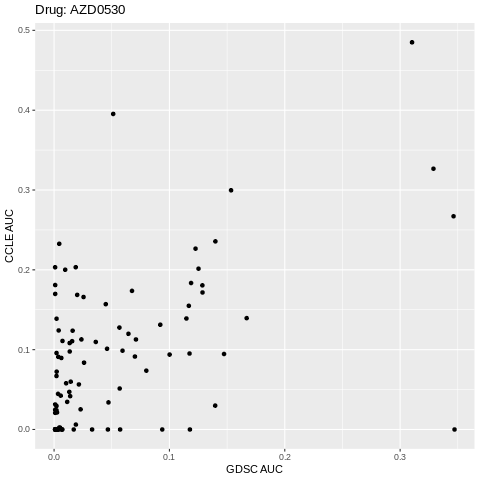

In [48]:
%%R
library(ggplot2)
x <- ggplot(aes(x=auc_GDSC, y=auc_CCLE), data=subset(cellLinesSummary, drug=="AZD0530")) +geom_point() + xlab("GDSC AUC") + ylab("CCLE AUC")
print(x + ggtitle("Drug: AZD0530"))

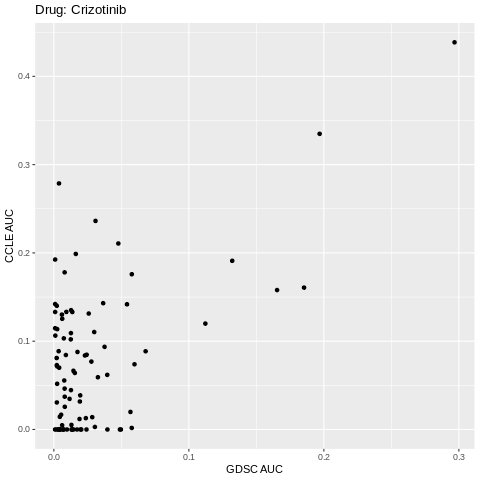

In [49]:
%%R
library(ggplot2)
x <- ggplot(aes(x=auc_GDSC, y=auc_CCLE), data=subset(cellLinesSummary, drug=="Crizotinib")) +geom_point() + xlab("GDSC AUC") + ylab("CCLE AUC")
print(x + ggtitle("Drug: Crizotinib"))

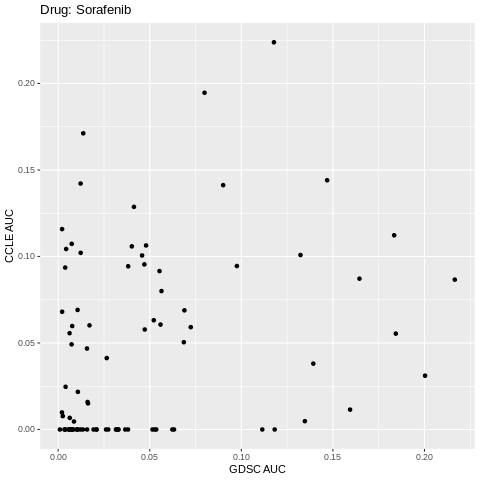

In [50]:
%%R
library(ggplot2)
x <- ggplot(aes(x=auc_GDSC, y=auc_CCLE), data=subset(cellLinesSummary, drug=="Sorafenib")) +geom_point() + xlab("GDSC AUC") + ylab("CCLE AUC")
print(x + ggtitle("Drug: Sorafenib"))

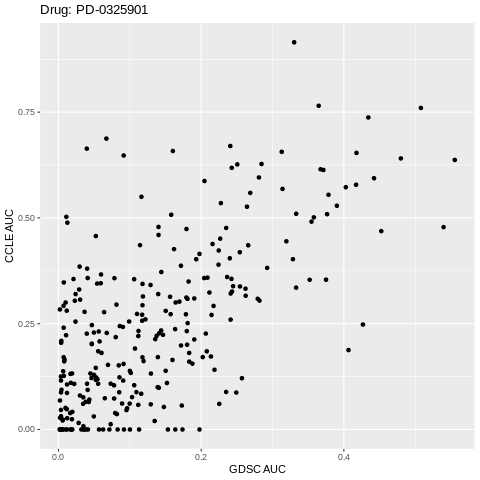

In [51]:
%%R
library(ggplot2)
x <- ggplot(aes(x=auc_GDSC, y=auc_CCLE), data=subset(cellLinesSummary, drug=="PD-0325901")) +geom_point() + xlab("GDSC AUC") + ylab("CCLE AUC")
print(x + ggtitle("Drug: PD-0325901"))

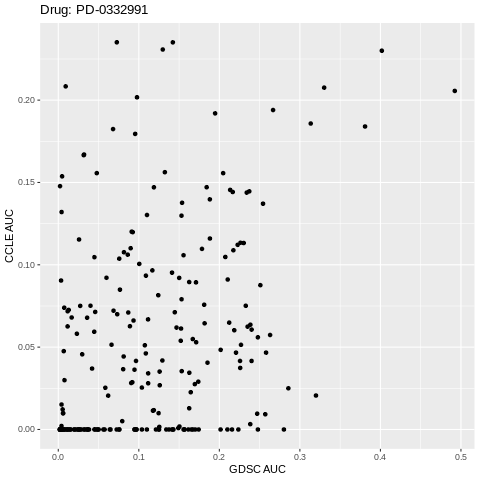

In [52]:
%%R
library(ggplot2)
x <- ggplot(aes(x=auc_GDSC, y=auc_CCLE), data=subset(cellLinesSummary, drug=="PD-0332991")) +geom_point() + xlab("GDSC AUC") + ylab("CCLE AUC")
print(x + ggtitle("Drug: PD-0332991"))

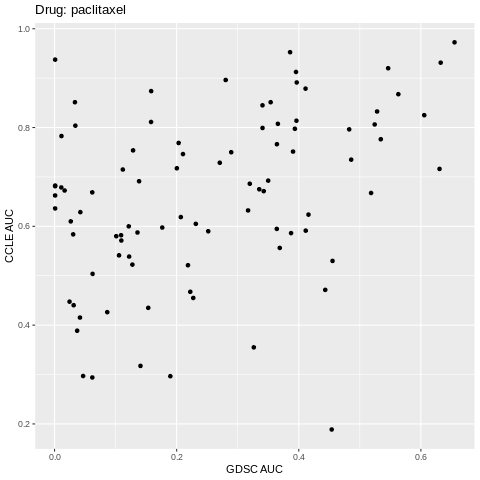

In [53]:
%%R
library(ggplot2)
x <- ggplot(aes(x=auc_GDSC, y=auc_CCLE), data=subset(cellLinesSummary, drug=="paclitaxel")) +geom_point() + xlab("GDSC AUC") + ylab("CCLE AUC")
print(x + ggtitle("Drug: paclitaxel"))

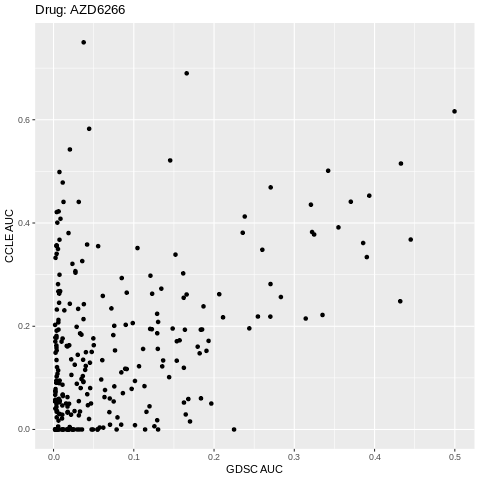

In [54]:
%%R
library(ggplot2)
x <- ggplot(aes(x=auc_GDSC, y=auc_CCLE), data=subset(cellLinesSummary, drug=="AZD6244")) +geom_point() + xlab("GDSC AUC") + ylab("CCLE AUC")
print(x + ggtitle("Drug: AZD6266"))

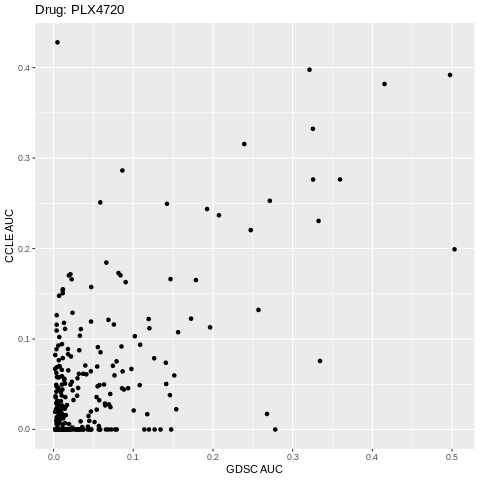

In [55]:
%%R
library(ggplot2)
x <- ggplot(aes(x=auc_GDSC, y=auc_CCLE), data=subset(cellLinesSummary, drug=="PLX4720")) +geom_point() + xlab("GDSC AUC") + ylab("CCLE AUC")
print(x + ggtitle("Drug: PLX4720"))

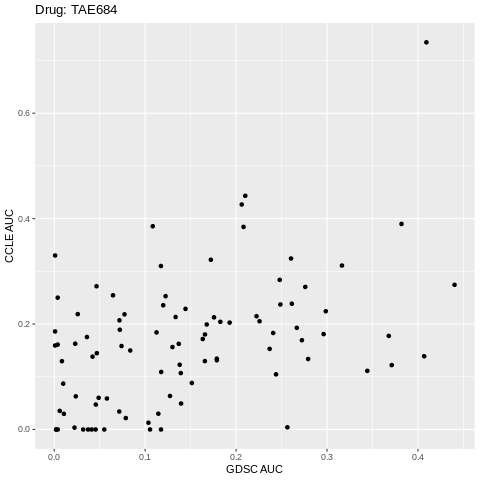

In [56]:
%%R
library(ggplot2)
x <- ggplot(aes(x=auc_GDSC, y=auc_CCLE), data=subset(cellLinesSummary, drug=="TAE684")) +geom_point() + xlab("GDSC AUC") + ylab("CCLE AUC")
print(x + ggtitle("Drug: TAE684"))

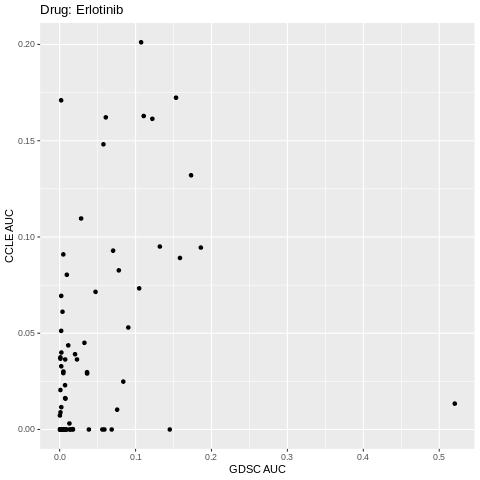

In [57]:
%%R
library(ggplot2)
x <- ggplot(aes(x=auc_GDSC, y=auc_CCLE), data=subset(cellLinesSummary, drug=="Erlotinib")) +geom_point() + xlab("GDSC AUC") + ylab("CCLE AUC")
print(x + ggtitle("Drug: Erlotinib"))

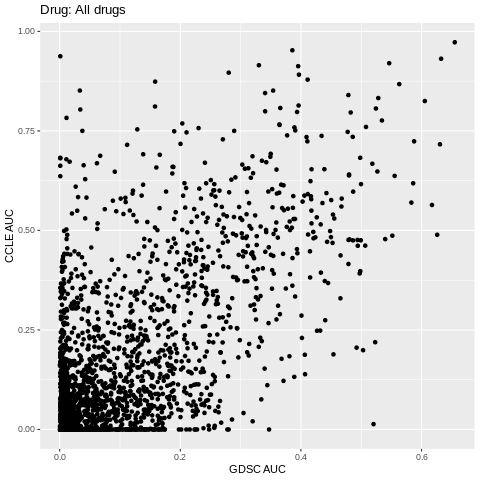

In [58]:
%%R
library(ggplot2)
x <- ggplot(aes(x=auc_GDSC, y=auc_CCLE), data=subset(cellLinesSummary)) +geom_point() + xlab("GDSC AUC") + ylab("CCLE AUC")
print(x + ggtitle("Drug: All drugs"))

#2. Calculate correlation coefficients of the AUC in GDSC and CCLE for each drug (hint: code from Tutorial 2 may help).

In [59]:
%%R
row_sub = apply(cellLinesSummary, 1, function(row) all(row !=0 ))
arreglado <- cellLinesSummary[row_sub,]

In [60]:
%%R
library(dplyr)

drugCorrs <- cellLinesSummary %>% 
    group_by(drug) %>% summarise(Pearson_auc=cor(-log10(auc_GDSC/10^6),-log10(auc_CCLE/10^6), method="pearson"),
                                 Spearman_auc=cor(-log10(auc_GDSC/10^6),-log10(auc_CCLE/10^6), method="spearman"))
drugCorrs

# A tibble: 15 × 3
   drug       Pearson_auc Spearman_auc
   <chr>            <dbl>        <dbl>
 1 17-AAG           0.515      0.569  
 2 AZD0530        NaN          0.444  
 3 AZD6244        NaN          0.290  
 4 Crizotinib     NaN          0.167  
 5 Erlotinib      NaN          0.452  
 6 lapatinib      NaN          0.429  
 7 Nilotinib      NaN          0.147  
 8 Nutlin-3       NaN          0.269  
 9 paclitaxel       0.115      0.384  
10 PD-0325901     NaN          0.607  
11 PD-0332991     NaN          0.332  
12 PHA-665752     NaN         -0.00138
13 PLX4720        NaN          0.377  
14 Sorafenib      NaN          0.289  
15 TAE684         NaN          0.419  


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/reshape2_1.4.4.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 37307 bytes (36 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

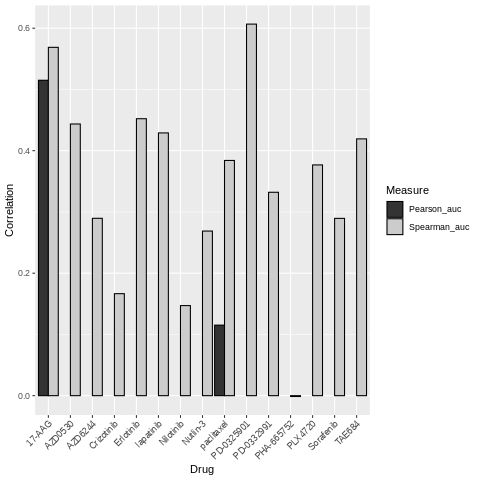

In [61]:
%%R
install.packages('reshape2')
library(reshape2)

drugCorrs <- melt(drugCorrs)
colnames(drugCorrs) <- c("Drug", "Measure", "Correlation")
drugCorrs_auc <- drugCorrs[grep("auc", drugCorrs$Measure),]

ggplot(data=drugCorrs_auc, aes(x=Drug, y=Correlation, fill=Measure, group=Measure)) +
  geom_bar(stat="identity", position=position_dodge(), colour="black") + 
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_grey()


R[write to console]: `geom_smooth()` using formula 'y ~ x'



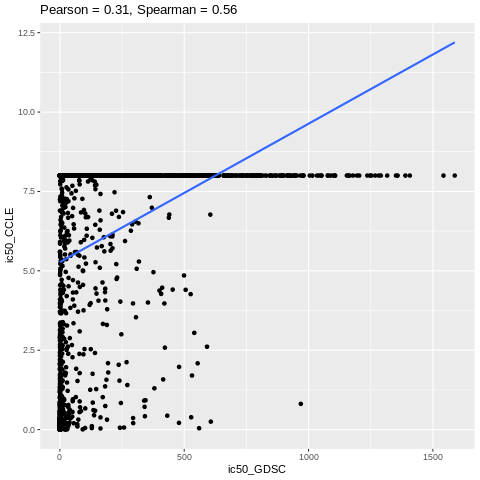

In [62]:
%%R
cor.pearson <- round(cor(cellLinesSummary$ic50_GDSC, cellLinesSummary$ic50_CCLE, method="pearson"),2)
cor.spearman <- round(cor(cellLinesSummary$ic50_GDSC, cellLinesSummary$ic50_CCLE, method="spearman"),2)

ggplot(data=cellLinesSummary, aes(x=ic50_GDSC,y=ic50_CCLE)) +
     geom_point() +
     ggtitle(paste0("Pearson = ", cor.pearson, ", Spearman = ", cor.spearman))+ 
     geom_smooth(method='lm', se=FALSE)

R[write to console]: `geom_smooth()` using formula 'y ~ x'



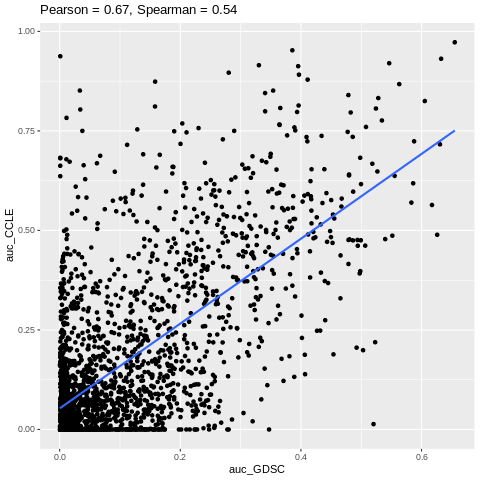

In [63]:
%%R
cor.pearson <- round(cor(cellLinesSummary$auc_GDSC, cellLinesSummary$auc_CCLE, method="pearson"),2)
cor.spearman <- round(cor(cellLinesSummary$auc_GDSC, cellLinesSummary$auc_CCLE, method="spearman"),2)

ggplot(data=cellLinesSummary, aes(x=auc_GDSC,y=auc_CCLE)) +
     geom_point() +
     ggtitle(paste0("Pearson = ", cor.pearson, ", Spearman = ", cor.spearman))+ 
     geom_smooth(method='lm', se=FALSE)

#3. Based on the scatterplot and correlation values, would you say that they tend to agree? Why or why not?

**Answer: Based on the scatterplot and correlation values both tend to agree on Spearman. This is because if the scatterplot is disperse then the Spearman value is higher while if not then is slower. Example Nilotinib is concentrated in the lower area and the Spearman value is lower in the Pearson and Spearman barplot. In the other two graphs with Spearman and Pearson they also dont agree much. In the AUC graph theres some values that correlate into a line but many dont.**

#4. Does the AUC or IC50 suggest more agreement between the studies? 

**Answer: Based on the study by Haibe-Kains both IC50 and AUC estimates had a poor agreement between studies.**
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4237165/#SD1

**But based on the analisys done AUC has a better agreement between AUC CCLE and GDSC because some values ended in a stright line. But still the agreement is very poor.**

#5. Which drug do you think shows the most consistency between the studies? How about the least? 

**Answer: Drug 17-AAG shows more consistency between studies. This is because both in AUC and IC50 there are similar results in Pearson and Spearman correlation graphs. The drug with least consistency is PHA-665752 beacuse the coefficient correlation is very different in both graphs of Pearson and Spearman. Also Haibe-Klains says "Lapatinib and Paclitaxel...overall consistency was rather poor".**

#6. If you calculated more than one type of correlation coefficient (for example Pearson and Spearman), how do they differ? Which do you think is a better summary of the consistency between the two studies? 

**Answer: The difference of both correlations is how Spearman is a better summary between both studies this is because in both graphs I was able to make the Spearson correlation. On the IC50 the Pearson value is 0.31 while the Spearman is 0.56. Also in the AUC the Pearson value is 0.67 and the Spearman is 0.54.**

#7. We have explored Pearson and Spearman correlation, but what about other correlation measures? For example, you could try out distance correlation, which is sensitive to nonlinear relationships. You can find this measure in the `energy` R package, which you'll need to install and load with the following commands:


In [64]:
%%R
install.packages("energy")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependency ‘gsl’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/gsl_2.1-7.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 222357 bytes (217 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to consol

#Then, you can compute distance correlation with the `dcor()` function. How does this correlation measure compare to Pearson and Spearman? Do your conclusions about the agreement between the two studies change at all using this measure?


In [65]:
!pip install dcor

In [66]:
#%%R
#dcor(cellLinesSummary$ic50_GDSC, cellLinesSummary$ic50_CCLE, 1.5)
from scipy.spatial import distance
import pandas as pd
import dcor
df = pd.read_csv("summarizedPharmacoData.csv")
dcor.distance_correlation(df['auc_GDSC'], df['auc_CCLE'])

0.6344004640488762

In [67]:
dcor.distance_correlation(df['ic50_GDSC'], df['ic50_CCLE'])

0.3678165053743398

**Answer: I couldnt load the "energy" library of R. Instead I tried in RStudio and was able to do the correlation. Also in order to have code here I used the python equivalent of distance correlation. The distance correlation of AUC was of 0.6344 while the Pearson as said before is 0.67 while the Spearman was 0.54. In the IC50 the distance correlation was 0.36 while the Pearson was 0.31 and Spearman 0.56. The distance correlation in both studies stand in between the Pearson and Spearman correlations. In the study Haibe-Klains explains how "Again, the drug sensitivity calls for both IC50 and AUC estimates(Supplementary Tables 1 and 2) had a poor agreement between studies". So both Pearson and spearman as little to no agreement between studies. Shin says that "Distance correlation ranges from 0 to 1, where 0 implies independence between variables and 1 implies that the linear subspaces of variables are equal." https://towardsdatascience.com/introducing-distance-correlation-a-superior-correlation-metric-d569dc8900c7
Based on this information the conclusion is that in AUC there is agreement because its closer to 1 while in IC50 theres little to no agreement because its closer to zero. Meaning that IC50 has independance between variables while AUC has linear subspaces of variables are equal.**

# Tutorial 3: Identifying biological factors that influence replicability

*   José Portela



In [68]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


### %load_ext rpy2.ipython lets run R programming commands on python on google collaboratory

{r setup, include=FALSE}

The %%R informs the program that the code writing below will be executed in R programming language

In [69]:
%%R 
knitr::opts_chunk$set(echo = TRUE)


{r read csv}

In [70]:
%%R
cellLinesSummary <- read.csv("summarizedPharmacoData.csv", header=TRUE)
str(cellLinesSummary)


'data.frame':	2557 obs. of  6 variables:
 $ cellLine : chr  "22RV1" "5637" "639-V" "697" ...
 $ drug     : chr  "Nilotinib" "Nilotinib" "Nilotinib" "Nilotinib" ...
 $ ic50_CCLE: num  8 7.48 8 1.91 8 ...
 $ auc_CCLE : num  0 0.00726 0.07101 0.15734 0 ...
 $ ic50_GDSC: num  155.27 219.93 92.18 3.06 19.63 ...
 $ auc_GDSC : num  0.00394 0.00362 0.00762 0.06926 0.02876 ...


{r, AUC resistant}

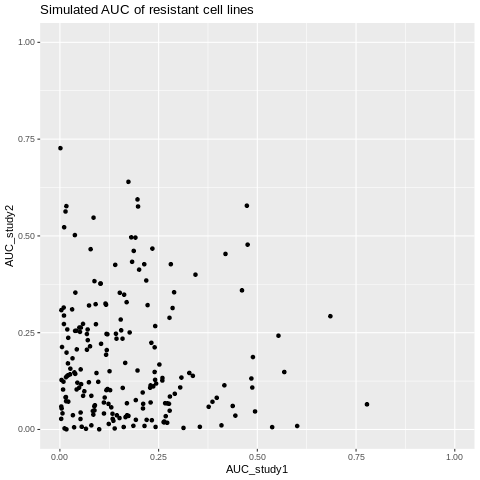

In [71]:
%%R
library(ggplot2)
AUC_study1 <- rbeta(200, 1, 5)
AUC_study2 <- rbeta(200, 1, 5)
resistant <- data.frame(AUC_study1, AUC_study2)
ggplot(resistant, aes( y=AUC_study2, x=AUC_study1) ) +
    geom_point() + ggtitle("Simulated AUC of resistant cell lines") +
    xlim(0,1) + ylim(0,1)

{r, AUC sensitive}

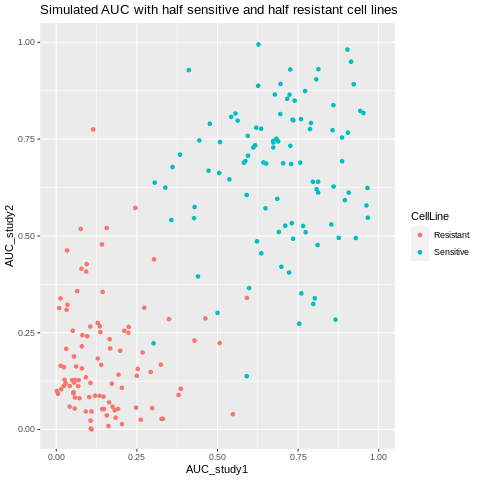

In [72]:
%%R
AUC_study1 <- c(rbeta(100, 1, 5), rbeta(100, 4, 2))
AUC_study2 <- c(rbeta(100, 1, 5), rbeta(100, 4, 2))
resistant <- data.frame(AUC_study1, AUC_study2, 
                        CellLine=c(rep("Resistant", 100), rep("Sensitive", 100)))
ggplot(resistant, aes( y=AUC_study2, x=AUC_study1, colour=CellLine) ) +
    geom_point() + ggtitle("Simulated AUC with half sensitive and half resistant cell lines") +
    xlim(0,1) + ylim(0,1)

If all cell lines are resistant to a particular drug, would you expect to find a high correlation between the two studies for that drug? Would that result imply that the two studies are not replicable?




*   In this case the most of the resistant cell lines have a low  correlation between both stuides in which wont imply not being replicable.



{r, ic50 by cell line}

In [73]:
%%R
install.packages("plyr")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/plyr_1.8.6.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 401191 bytes (391 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write t

Since google collabs runs on python not every R package will be available so for this tutorial plyr was the case so we run install.packages("plyr") to obtain this library 

R[write to console]: 
Attaching package: ‘tidyr’


R[write to console]: The following object is masked from ‘package:reshape2’:

    smiths


R[write to console]: ------------------------------------------------------------------------------

R[write to console]: You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

R[write to console]: ------------------------------------------------------------------------------

R[write to console]: 
Attaching package: ‘plyr’


R[write to console]: The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize




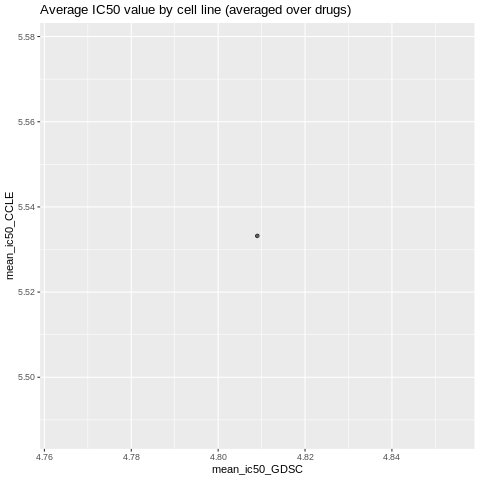

In [74]:
%%R
library(tidyr)
library(plyr)
library(dplyr)


drugAvg <- cellLinesSummary %>% 
              group_by(cellLine) %>%
              summarise(mean_ic50_CCLE = mean(-log10(ic50_CCLE/10^6)), 
                        mean_ic50_GDSC = mean(-log10(ic50_GDSC/10^6)),
                        mean_auc_CCLE = mean(auc_CCLE),
                        mean_auc_GDSC = mean(auc_GDSC)) 

ggplot(drugAvg, aes(x=mean_ic50_GDSC, y=mean_ic50_CCLE)) +
    geom_point(alpha=0.6) +
    ggtitle("Average IC50 value by cell line (averaged over drugs)")

{r, auc by cell line}

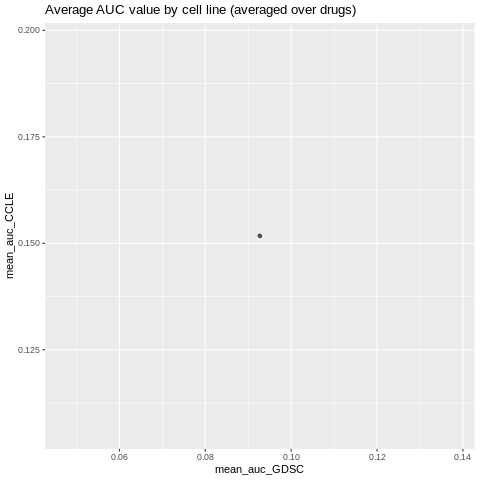

In [75]:
%%R
ggplot(drugAvg, aes(x=mean_auc_GDSC, y=mean_auc_CCLE)) +
    geom_point(alpha=0.6) +
    ggtitle("Average AUC value by cell line (averaged over drugs)")

What is the most sensitive cell line?




*   The one with x = 0.3 of mean_auc_GDSC and y = 0.4 of mean_auc_CCLE or in other terms (0.3,0.4).



{r, create sensitivity}

In [76]:
%%R
cellLinesSummary <- cellLinesSummary %>% 
              mutate(cutoff = ifelse(drug=="paclitaxel", 0.4, 0.1)) %>%
              mutate(sensitivity_GDSC = factor(ifelse( auc_GDSC < cutoff, "Resistant", "Sensitive")), 
                     sensitivity_CCLE = factor(ifelse( auc_CCLE < cutoff, "Resistant", "Sensitive"))) 

table("GDSC"=cellLinesSummary$sensitivity_GDSC, "CCLE"=cellLinesSummary$sensitivity_CCLE)

           CCLE
GDSC        Resistant Sensitive
  Resistant      1289       486
  Sensitive       217       565


What proportion of the drug-cell line combinations are in agreement of sensitivity/resistance between the two studies?




*   It has a proportion of 486 in the case of Resistant/Sensitive and in case of the question for Sensitive/Resistance is 217.



{r, auc by sensitivity}

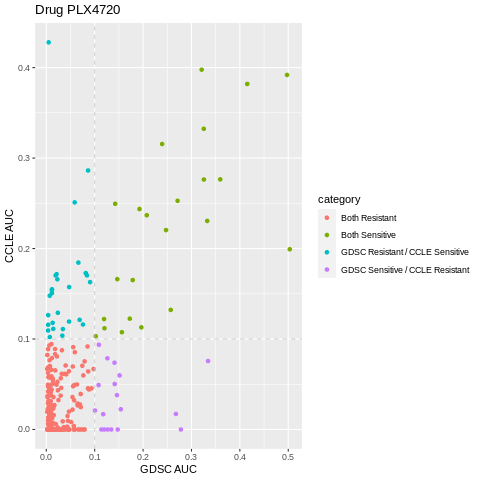

In [77]:
%%R
cellLinesSummary <- cellLinesSummary %>% 
              mutate(category = paste(sensitivity_GDSC, sensitivity_CCLE)) %>%
              mutate(category = revalue(category, c("Resistant Resistant" = "Both Resistant",
                                                    "Sensitive Sensitive" = "Both Sensitive",
                                                    "Resistant Sensitive" = "GDSC Resistant / CCLE Sensitive",
                                                    "Sensitive Resistant" = "GDSC Sensitive / CCLE Resistant")))
table(cellLinesSummary$category)

ggplot(aes(x=auc_GDSC, y=auc_CCLE, colour=category), data=subset(cellLinesSummary, drug=="PLX4720")) +
    geom_point() + 
    xlab("GDSC AUC") +
    ylab("CCLE AUC") +
    geom_hline(aes(yintercept=cutoff), colour="grey", alpha=0.75, lty=2) +
    geom_vline(aes(xintercept=cutoff), colour="grey", alpha=0.75, lty=2) +
    ggtitle("Drug PLX4720")

In this plot, which colors of points correspond to 'agreement' between the two studies? 




*   Orange and Green.



Overall, do most cell lines seem to agree or disagree in whether they were sensitive or resistant to PLX4720?




*   Just by looking at it looks a well balance but most cell lines are concentrated in being resistan in both studies.



{r, sensitivity all drugs}

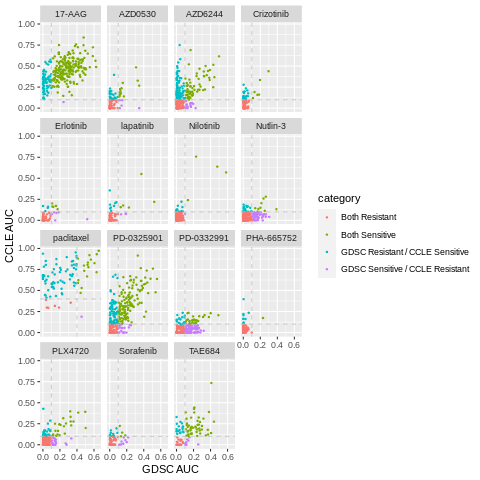

In [78]:
%%R
ggplot(aes(x=auc_GDSC, y=auc_CCLE, colour=category), data=cellLinesSummary) +
    geom_point(cex=0.5) + 
    facet_wrap(facets=~drug) +
    xlab("GDSC AUC") +
    ylab("CCLE AUC") +
    geom_hline(aes(yintercept=cutoff), colour="grey", alpha=0.75, lty=2) +
    geom_vline(aes(xintercept=cutoff), colour="grey", alpha=0.75, lty=2) 

{r, matthews}

In this last part I decided to split it up into two parts. The first being function to calculate and the second the function and graph or plot that is being made.

In [79]:
%%R
# Function to calculate the MCC from two vectors with possible values "Sensitive" and "Resistant"
mcc <- function (study1, study2)
{
  BS <- sum(study1 == "Sensitive" & study2 == "Sensitive") 
  BR <- sum(study1 == "Resistant" & study2 == "Resistant") 
  SR <- sum(study1 == "Sensitive" & study2 == "Resistant") 
  RS <- sum(study1 == "Resistant" & study2 == "Sensitive") 
  
  if (BS+SR == 0 | BS+RS == 0 | BR+SR == 0 |  BR+RS ==0){
    mcc <- ((BS*BR)-(SR*RS)) 
  }else{
    mcc <- ((BS*BR)-(SR*RS)) / sqrt(exp((log(BS+SR)+log(BS+RS)+log(BR+SR)+log(BR+RS))))
  }
  return(mcc)
}

drugCorrs <- cellLinesSummary %>% 
  group_by(drug) %>% 
  summarise(matthews_corr=mcc(sensitivity_GDSC, sensitivity_CCLE))

drugCorrs

# ggplot(data=drugCorrs, aes(x=drug, y=matthews_corr)) +
#   geom_bar(stat="identity") + 
#   theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
#   xlab("Drug")+
#   ylab("Matthews Correlation Coefficient")

  matthews_corr
1     0.4201924


In [80]:
# %%R
# drugCorrs <- cellLinesSummary %>% 
#   group_by(drug) %>% 
#   summarise(matthews_corr=mcc(sensitivity_GDSC, sensitivity_CCLE))

# drugCorrs



Examining the Matthew's correlation values that take into account cell line categories, which drug do you think shows the most consistency between the studies? How about the least? 



*   Erlotinib shows most consistency 
*   17-AAG shows least consistency



### Questions for:  Identifying biological factors that influence replicability of pharmacogenomic studies



1. Are there any cell lines that seem to be consistently sensitive? (Hint: look for the 5 cell lines which seem the most resistant in both studies according to the average drug response by AUC; code from Tutorial 3 may help) What effect might this have on your conclusions and interpretations of the agreement between the studies? For example, do you observe any increase in replicability (as measured by correlation of drug response) if you exclude the most resistant cell lines?

 **From the fifteen drugs that were studied, drug 17-AAG shows to be more consistenly sensitive of them all. Besides 17-AAG the other drug close is PD-0325901.If I were to exclude the most resistant cell lines from my observations, besides 17-AAG there is not any high and/or good increase in replicability.**



2. Classify each cell line as resistant or sensitive to a drug based on its AUC value (Hint: choose a cutoff for which cell lines with AUC below the cutoff are considered sensitive and explain your choice of cutoff(s); code from Tutorial 3 may help). Compare the resistance status of cell lines in GDSC and CCLE for each drug using either a scatterplot of AUC values colored by resistance/sensitivity in each study or a table.

 **Answer to this question can be found in {r,sensitivity all drugs} from tutorial 3.**



3. Compute the Matthews correlation coefficient for sensitivity status (from #2) of cell lines in GDSC and CCLE for each drug (Hint: code from Tutorial 3 may help). 

  **Answer to this question can be found in {r,matthews} from tutorial 3.**

4. Are there any drugs for which most or all cell lines seem to be resistant in both studies (Hint: for each cell line, look at its average response across all drugs; code from Tutorial 3 may help)? If so, what are the correlation values for these drugs? What do these results imply about the replicability of these studies?
  
  **Erlotinib, Laptinib, Nilotinib and PHA-665752 are the drugs for which most or all cell lines seem to be resistant in both studies. Now base on the correlation bar graph each drug have a correlation of: Erlotinib : 0.4, Lapatinib : 0.4, Nilotinib: 0.3 and PHA-66572 : 0.3. By these results it can be imply that most drugs studies are less resistant and more sensitive.**


5. Compare the Matthews correlation coefficient values by drug classes defined in Tutorial 3 (No effect, Narrow effect, Broad effect). Which drug class shows the most agreement between the studies? 
    
    **Drug classes:**

  **No effect: Sorafenib, Erlotinib and PHA-665752 (This had minimal observed response for all cell lines)**
 
  **Narrow effect: Nilotinib, Lapatinib, Nutlin-3, PLX44720, Crizotinib, PD-0332991, AZD0530, TAE684 (Response in only a small subset of cell lines)**

  **Broad Effect: AZD6244, PD-0325901, 17-AAG and Paclitaxel (Response in large number of cell lines)**

  

*   **From the diffrent drugs classes, the Narrow effect class shows the mostagreement between studies**


6. Would you say that the sensitivity results for the two studies tend to agree?

  **Yes, because most of the cell lines responded in favor of sensitivity in comparison to resistant.**


7. For one of the targeted drugs, examine the cell lines that were sensitive ih the CCLE and/or GDSC. See if you can find out what types of cells these are by searching the online Cancer Cell Line Encyclopedia http://www.broadinstitute.org/ccle (this will prompt you to register with a username, password, and email address. If you prefer, you can also search the cell line on other websites). See if you can find out what types of cancers this drug is targeted for using the NCI cancer drug database at https://www.cancer.gov/about-cancer/treatment/drugs. Does the list of cell lines found to be sensitive in the two studies agree with this?

  **According to the National Institute of Cancer(https://www.cancer.gov/about-cancer/treatment/drugs/nilotinib), Nilotinib is FDA approved and is use for Chronic Myelogenous Leukemia (CML). For these specific drug it tend to be more resistant tha sensitive.**

#Tutorial 4: Modeling the Relation between Two Variables (Drug Concentration vs Viability)


In [81]:
%load_ext rpy2.ipython
import warnings
warnings.filterwarnings('ignore')

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [82]:
%%R
library(dplyr)

In [83]:
%%R
{echo = FALSE}
knitr::opts_chunk$set(cache=FALSE, warning=FALSE)

In [84]:
%%R
install.packages("cowplot")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/cowplot_1.1.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1353271 bytes (1.3 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

In [85]:
%%R
rawFile <- "rawPharmacoData.csv"
summarizedFile <- "summarizedPharmacoData.csv"
pharmacoData <- read.csv(rawFile)
summarizedData <- read.csv(summarizedFile)
if( !file.exists( rawFile ) ){
    source("downloadData.R")
}
library(ggplot2)
library(dplyr)
library(cowplot)
plotResponse <- function(drugA, cellLineA, addPublishedIC50=TRUE ){
  pharSub <- filter( pharmacoData, drug==drugA, cellLine==cellLineA )
  sumSub <- filter( summarizedData, drug==drugA, cellLine==cellLineA )
  p <- ggplot( pharSub, aes( log10(concentration), viability, col=study)) +
      geom_point(size=2.1) + geom_line(lwd=1.1) + ylim(0, 150)
  if( addPublishedIC50 ){
      p <- p + geom_vline( sumSub, xintercept=log10( sumSub[,"ic50_CCLE"] ), col="#d95f02", linetype="longdash") +
          geom_vline( xintercept=log10( sumSub[,"ic50_GDSC"]), col="#1b9e77", linetype="longdash") +
          geom_hline( yintercept=50, col="#00000050", linetype="longdash")
  }
  p <- p + scale_colour_manual( values = c("CCLE" = "#d95f02", "GDSC" = "#1b9e77" ))
  xlims <- xlim( range(log10(c(pharSub$concentration, sumSub$ic50_CCLE, sumSub$ic50_GDSC ) ) ) )
  p + xlims
}

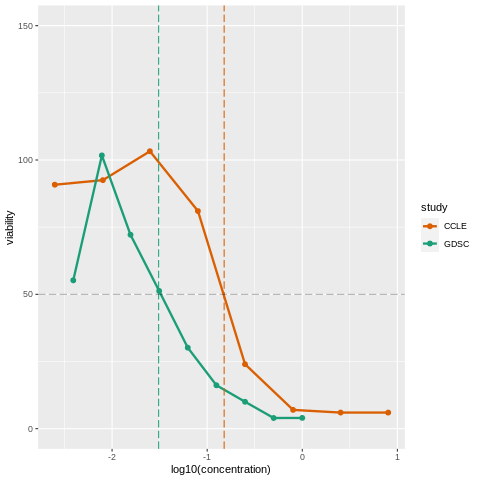

In [86]:
%%R
plotResponse( drugA="17-AAG", cellLineA="H4",TRUE)

The plot define above will visualize the viability scores as a function
of the drug concentrations in each study. The vertical dotted lines
display the IC50 value published from each study. Let's start by
exploring how the response curve for the drug 17-AAG behaves in the
cell-line H4.  Notice that this drug was reported to have consistent viability
responses between the two studies.



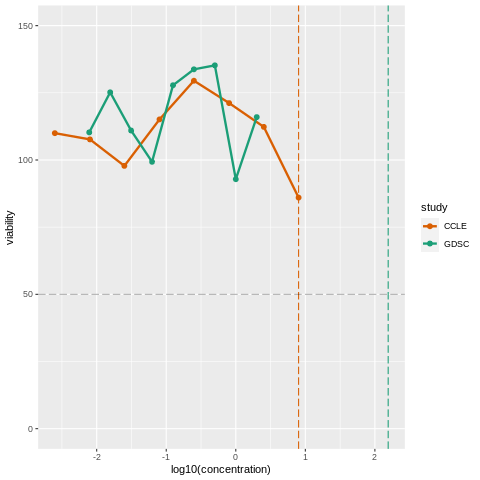

In [87]:
%%R
plotResponse( drugA="Nilotinib", cellLineA="22RV1", TRUE )

Are the reported IC50 values reflecting the actual behaviour
of the response curves? How can IC50 values be estimated if
there are no viabilities below 50% for the second example? 
How did the two different studies deal with these cases?

 - According to Haibe-Kains et al. one study dealt with this by using a Bayesian sigmoid models model for drug response for the IC50. CCLE just reported the maximum concentration for inactive compounds. 

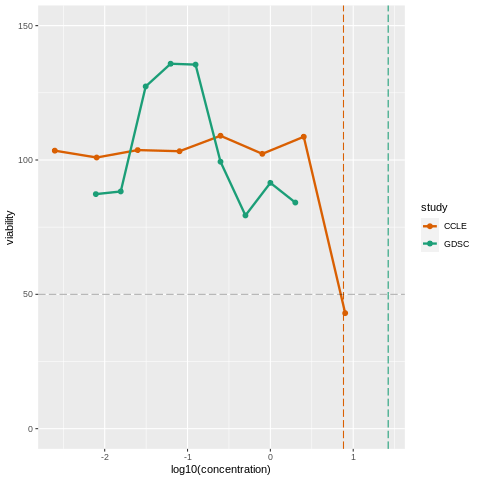

In [88]:
%%R
plotResponse( drugA="Nilotinib", cellLineA="H4", TRUE )

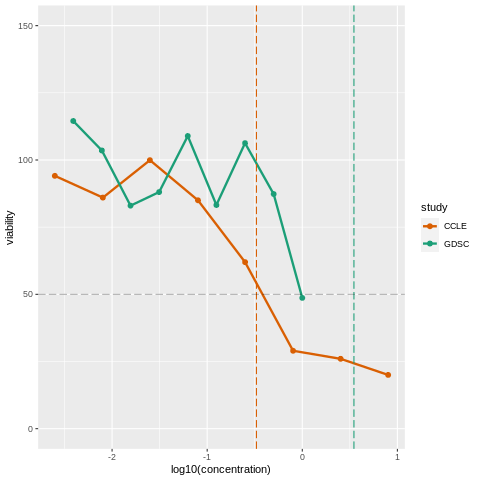

In [89]:
%%R
plotResponse( drugA="17-AAG", cellLineA="22RV1", TRUE )

In [90]:
%%R
fitLogisticModel <- function(drugA, cellLineA, studyA){
    pharSub <- filter( pharmacoData, drug==drugA, cellLine==cellLineA, study==studyA)
    inRange <- pharSub$viability > 0 & pharSub$viability < 100
    pharSub$viability <- round(pharSub$viability)
    pharSub$concentration <- log10( pharSub$concentration )
    maxVal <- pmax( pharSub$viability, 100 )
    fit <- glm( cbind( viability, maxVal-viability ) ~ concentration,
               pharSub, family=binomial )
    fit
}

In [91]:
%%R
lrCCLE1 <- fitLogisticModel( "17-AAG", "H4", "CCLE" )
lrGDSC1 <- fitLogisticModel( "17-AAG", "H4", "GDSC" )
lrCCLE2 <- fitLogisticModel( "Nilotinib", "22RV1", "CCLE" )
lrGDSC2 <- fitLogisticModel( "Nilotinib", "22RV1", "GDSC" )
lrCCLE1
lrCCLE2


Call:  glm(formula = cbind(viability, maxVal - viability) ~ concentration, 
    family = binomial, data = pharSub)

Coefficients:
  (Intercept)  concentration  
        4.142         -2.104  

Degrees of Freedom: 7 Total (i.e. Null);  6 Residual
Null Deviance:	    59.92 
Residual Deviance: 25.39 	AIC: 36.32


In [92]:
%%R
predictValues <- function( fit, numPred=1000){
    min <- min( fit$data$concentration )
    max <- max( fit$data$concentration )
    valuesToPredict <- seq(min, max, length.out=numPred)
    predicted <- predict( fit,
            data.frame(concentration=valuesToPredict),
            type="response" )
    data.frame( concentration=valuesToPredict,
               viability=predicted*100 )
}

In [93]:
%%R
plotFit <- function(p, fitCCLE, fitGDSC ){
    p <- p + geom_line( aes( concentration, viability ),
              data=predictValues( fitCCLE ), lwd=1.2,
              linetype="dashed", col="#d95f02" )+
    geom_line( aes( concentration, viability ),
              data=predictValues( fitGDSC ), lwd=1.2,
              linetype="dashed", col="#1b9e77")
    p
}

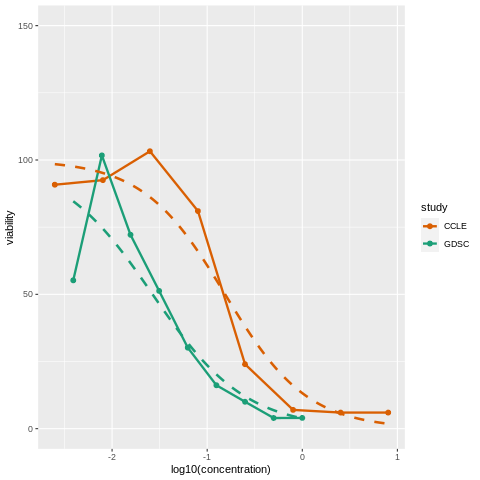

In [94]:
%%R
plotFit( plotResponse( "17-AAG", "H4", FALSE ),
        fitCCLE=lrCCLE1, fitGDSC=lrGDSC1 )

R[write to console]: Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



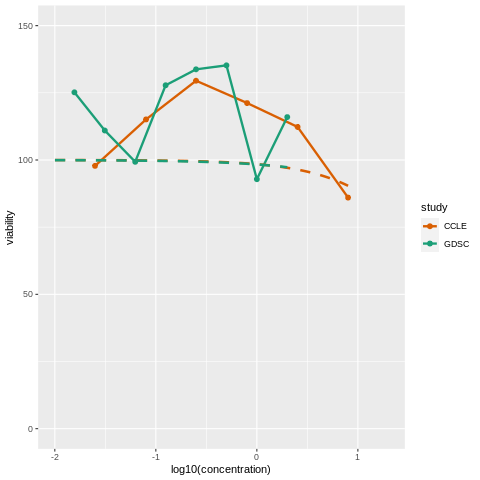

In [95]:
%%R
plotFit( plotResponse( "Nilotinib", "22RV1", FALSE ),
        fitCCLE=lrCCLE2, fitGDSC=lrGDSC2 ) +
        xlim(-2, 1.3)


### IC50 and AUC calculation from logistic regression models


In [96]:
%%R
library(magrittr)
getIC50Value <- function( fit ){
    if( !fit$converged ){
      return( NA )
    }
    predictValues( fit, numPred=10000 ) %>% 
    { .$concentration[which.min( abs( .$viability - 50) )] }
}


R[write to console]: 
Attaching package: ‘magrittr’


R[write to console]: The following object is masked from ‘package:tidyr’:

    extract




In [97]:
%%R
10^getIC50Value( lrCCLE1 )
10^getIC50Value( lrGDSC1 )
filter( summarizedData, drug=="17-AAG", cellLine=="H4")[,c("ic50_CCLE", "ic50_GDSC")]


  ic50_CCLE  ic50_GDSC
1 0.1507716 0.03090495


In [98]:
%%R
10^getIC50Value( lrCCLE2 )
10^getIC50Value( lrGDSC2 )
filter( summarizedData, drug=="Nilotinib", cellLine=="22RV1")[,c("ic50_CCLE", "ic50_GDSC")]

  ic50_CCLE ic50_GDSC
1         8  155.2699


In [99]:
%%R
getAUCValue <- function( fit ){
    numbOfPredictions <- 10000
    if( !fit$converged ){
      return( NA )
    }
    x <- 1 - ( predictValues( fit, numPred=numbOfPredictions )$viability / 100 ) ## difference between 1 and the predicted viability probability
    x <- sum( x ) ## summing all the predicted values
    x / numbOfPredictions ## normalize such that the total area sums to 1
}


In [100]:
%%R
getAUCValue( lrCCLE1 )
getAUCValue( lrGDSC1 )
filter( summarizedData, drug=="17-AAG", cellLine=="H4")

  cellLine   drug ic50_CCLE  auc_CCLE  ic50_GDSC auc_GDSC
1       H4 17-AAG 0.1507716 0.4868125 0.03090495  0.55157


In [101]:
%%R
getAUCValue( lrCCLE2 )
getAUCValue( lrGDSC2 )
filter( summarizedData, drug=="Nilotinib", cellLine=="22RV1")

  cellLine      drug ic50_CCLE auc_CCLE ic50_GDSC auc_GDSC
1    22RV1 Nilotinib         8        0  155.2699 0.003935


In [ ]:
%%R
mySummarizedData <- suppressWarnings( lapply( seq_len( nrow( summarizedData )), function(x){
  drug <- as.character( summarizedData$drug[x] )
  cellLine <- as.character( summarizedData$cellLine[x] )
  fitCCLE <- try( fitLogisticModel( drug, cellLine, "CCLE" ), silent=TRUE)
  fitGDSC <- try( fitLogisticModel( drug, cellLine, "GDSC" ), silent=TRUE)
  if( inherits(fitCCLE, "try-error") ){
    ic50CCLE <- NA
    aucCCLE <- NA
  }else{
    ic50CCLE <- 10^getIC50Value( fitCCLE )
    aucCCLE <- getAUCValue( fitCCLE )
  }
  if( inherits(fitGDSC, "try-error") ){
    ic50GDSC <- NA
    aucGDSC <- NA
  }else{
    ic50GDSC <- 10^getIC50Value( fitGDSC )
    aucGDSC <- getAUCValue( fitGDSC )
  }
  data.frame( drug=drug, 
     cellLine=cellLine, 
     ic50_CCLE=ic50CCLE, 
     auc_CCLE=aucCCLE,
     ic50_GDSC=ic50GDSC,
     auc_GDSC=aucGDSC )
} ) )



In [ ]:
%%R
mySummarizedData <- do.call( rbind, mySummarizedData )

In [ ]:
%%R
allSummarizedData <- merge( x=summarizedData, y=mySummarizedData, by=c("drug", "cellLine"))

In [ ]:
%%R
ggplot( 
  filter( allSummarizedData, drug=="17-AAG"), aes( -log10(ic50_GDSC.y), -log10( ic50_CCLE.y) ) ) +
  geom_point()


In [ ]:
%%R
ggplot( 
  filter( allSummarizedData, drug=="17-AAG"), aes( auc_GDSC.y, auc_CCLE.y ) ) +
  geom_point()

In [ ]:
%%R
fitLinearModel <- function(drugA, cellLineA, studyA){
    pharSub <- filter( pharmacoData, drug==drugA, cellLine==cellLineA, study==studyA)
    pharSub$concentration <- log10( pharSub$concentration )
    fit <- lm( viability~ concentration, pharSub )
    fit
}

In [ ]:
%%R
linearModelCCLE1 <- fitLinearModel( "17-AAG", "H4", "CCLE" )
slope1 <- coefficients( linearModelCCLE1 )["concentration"]
linearModelGDSC1 <- fitLinearModel( "17-AAG", "H4", "GDSC" )
slope2 <- coefficients( linearModelGDSC1 )["concentration"]

In [ ]:
%%R
predictValues <- function( fit, numPred=1000){
    min <- min( fit$data$concentration )
    max <- max( fit$data$concentration )
    valuesToPredict <- seq(min, max, length.out=numPred)
    predicted <- predict( fit,
            data.frame(concentration=valuesToPredict),
            type="response" )
    data.frame( concentration=valuesToPredict,
               viability=predicted*100 )
}

In [ ]:
%%R
library(ggplot2)
IC50_study1 <- rbeta(200, 1, 5)
IC50_study2 <- rbeta(200, 1, 5)
resistant <- data.frame(IC50_study1, IC50_study2)
ggplot(resistant, aes( y=IC50_study2, x=IC50_study1) ) +
    geom_point() + ggtitle("Simulated IC50 of resistant cell lines") +
    xlim(0,1) + ylim(0,1)

In [ ]:
%%R
library(ggplot2)
AUC_study1 <- rbeta(200, 1, 5)
AUC_study2 <- rbeta(200, 1, 5)
resistant <- data.frame(AUC_study1, AUC_study2)
ggplot(resistant, aes( y=IC50_study2, x=IC50_study1) ) +
    geom_point() + ggtitle("Simulated IC50 of resistant cell lines") +
    xlim(0,1) + ylim(0,1)

### Modeling the relation between two variables (drug concentration vs viability)

1. Explore the response curves for several drug-cell line combinations. How many drugs-cell line combinations contain viability response values that would potentially enable them to be summarized into an IC50 value? You can answer this, for example, by checking whether there are viability values below 50%.
- The only curves with values under 50% seem to be the combination of the drug 17-AAG and cell line H4. When graphed the curves coincide with the IC50 values given by the studies and represented by the vertical dotted lines. The combination of 17-AAG and 22RV1 have values under 50%, however these do not coincide with the suggested IC50 values. 

2. Analyze the re-calculations of IC50 and AUCs from the drug 17-AAG in the H4 cell-line and the drug Nilotinib cell-line in the 22RV1 cell-line. See the figure below and asnwer: which statistic is more roboust, IC50 or AUC? Which statistic is more generalizable, IC50 or AUC? Justify your answer with examples and/or using the whole data recalculations from the *mySummarizedData* variable.
- Although the picture on the bottom doesn't load, I will argue that the IC50 is more robust and less generalizable, while the AUC is the opposite. This is because Haibes-Kain et al. mentions that while the first cannot be estimated due to the effect of the drug in the study, the latter can. "In both studies, the IC50 could not be estimated in many cases, as drug concentration necessary to inhibit 50% of growth was not reached. In CGP, IC50 was estimated using a Bayesian sigmoid model for drug response. In contrast, CCLE reported the maximum concentration for inactive compounds (referred to as placeholder values) rather than the extrapolated IC50. AUC measures do not require extrapolation and can always be estimated from the dose–response curve."

<img src="Figures/reproducible.png" width="400px" height="200px" />
Modified from [Kirstie Whitaker](https://github.com/KirstieJane/).

3. Are the results more replicable if one uses the same code to calculate IC50 or AUC on the different datasets? Hint: you can use code from tutorial #3 to evaluate this.
- I attempted to do this analysis, however I kept getting the same graph. Most likely I used the incorrect code to attempt to answer this question. 
4. Summarize the viability curves of all the drugs in each cell-line using the slope of linear model. Is the slope of the linear regression informative of the drug response? Can we improve the replicability of the studies by using the value of the slope instead of IC50s or AUCs? 
- I was unable to achieve this summarized version. 

## Discussion:

Summarize the main findings of your analyses in the previous four sections here. 

**Tutorial 1: In this tutorial we explored the data we are working with. We then made sure that the data made sense and was correct, and performed a basic analysis using an histogram of the viability as a function to the drug concentration.**

**Tutorial 2: There is little to no correlation between the studies of AUC and IC50. We did different correlation, Pearson, Spearman and distance correlation.  Based on the distance correlation in AUC there is agreement because its closer to 1 while in IC50 theres little to no agreement because its closer to zero. Meaning that IC50 has independance between variables while AUC has linear subspaces of variables are equal.**

**Tutorial 3: Finding factors that helps two different studies, CCLE and GDSC.For this the AUC and IC50 average value on drugs were analyzed.Then the proportion of two factors, sensitivity and resistant were implied to see how drugs were reacting in both studies.In addition a Matthew's correlation was taken into account to verify if he drugs were really showing their true values,in this case if both were resistant or sensitive or a combination of one being sensitive in one study and resistant in the other and vice versa. Overall it show in both studies,CCLE and GDSC, that the drugs were more consistant in sensitivity rather than resistant.**

**Tutorial 4:During this tutorial, we observed the relation between the drug concentration and viability. We compared cell line and drug combinations across studies, in relation to viability as measured by IC50 and AUC. We attempted to create a summarized version of these comparisons to no avail.**